In [ ]:
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 7.6 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=b434e8cba99b9e17d14d7b158d3bf9ff348010fd1de6e67fb8961490632ee325
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 8.5 MB/s 
     |████████████████████████████████| 7.6 MB 36.3 MB/s 
     |████████████████████████████████| 182 kB 49.8 MB/s 


In [ ]:
# For Data
import pandas as pd
import numpy as np

#  For Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import missingno as msno
from wordcloud import WordCloud

# For NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


# For Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# For Styling
plt.style.use('default')

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/nlp_side_hustle/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(data_folder +'Corona_NLP_train.csv',encoding='ISO-8859-1')
df_test = pd.read_csv(data_folder + 'Corona_NLP_test.csv')

In [ ]:
df

UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1      advice Talk to your neighbours family to excha...            Positive  
2      Coronavirus Australia: Woolworths to give elde...            Positive  
3      My food stock is not the only one which is emp...            Positive  
4      Me, ready to go at supermarket during the #COV...  Extremely Negative  
...                                                  ...                 ...  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative  

[41157 rows x 6 columns]

In [ ]:
df_test

UserName  ScreenName             Location     TweetAt  \
0            1       44953                  NYC  02-03-2020   
1            2       44954          Seattle, WA  02-03-2020   
2            3       44955                  NaN  02-03-2020   
3            4       44956          Chicagoland  02-03-2020   
4            5       44957  Melbourne, Victoria  03-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                          OriginalTweet           Sentiment  
0     TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1     When I couldn't find hand sanitizer at Fred Me...            Positive  
2     Find out how you can protect yourself and love...  Extremely Positive  
3     #Panic buying hits #NewYork City as anxious sh...            Negative  
4     #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral  
...                                                 ...                 ...  
3793  Meanwhile In A Supermarket in Israel -- People...            Positive  
3794  Did you panic buy a lot of non-perishable item...            Negative  
3795  Asst Prof of Economics @cconces was on @NBCPhi...             Neutral  
3796  Gov need to do somethings instead of biar je r...  Extremely Negative  
3797  I and @ForestandPaper members are committed to...  Extremely Positive  

[3798 rows x 6 columns]

In [ ]:
df['TweetAt'] = pd.to_datetime(df['TweetAt'])

In [ ]:
df['Length'] = df['OriginalTweet'].apply(len)

Text(0.5, 1.0, 'Missing values of each columns')

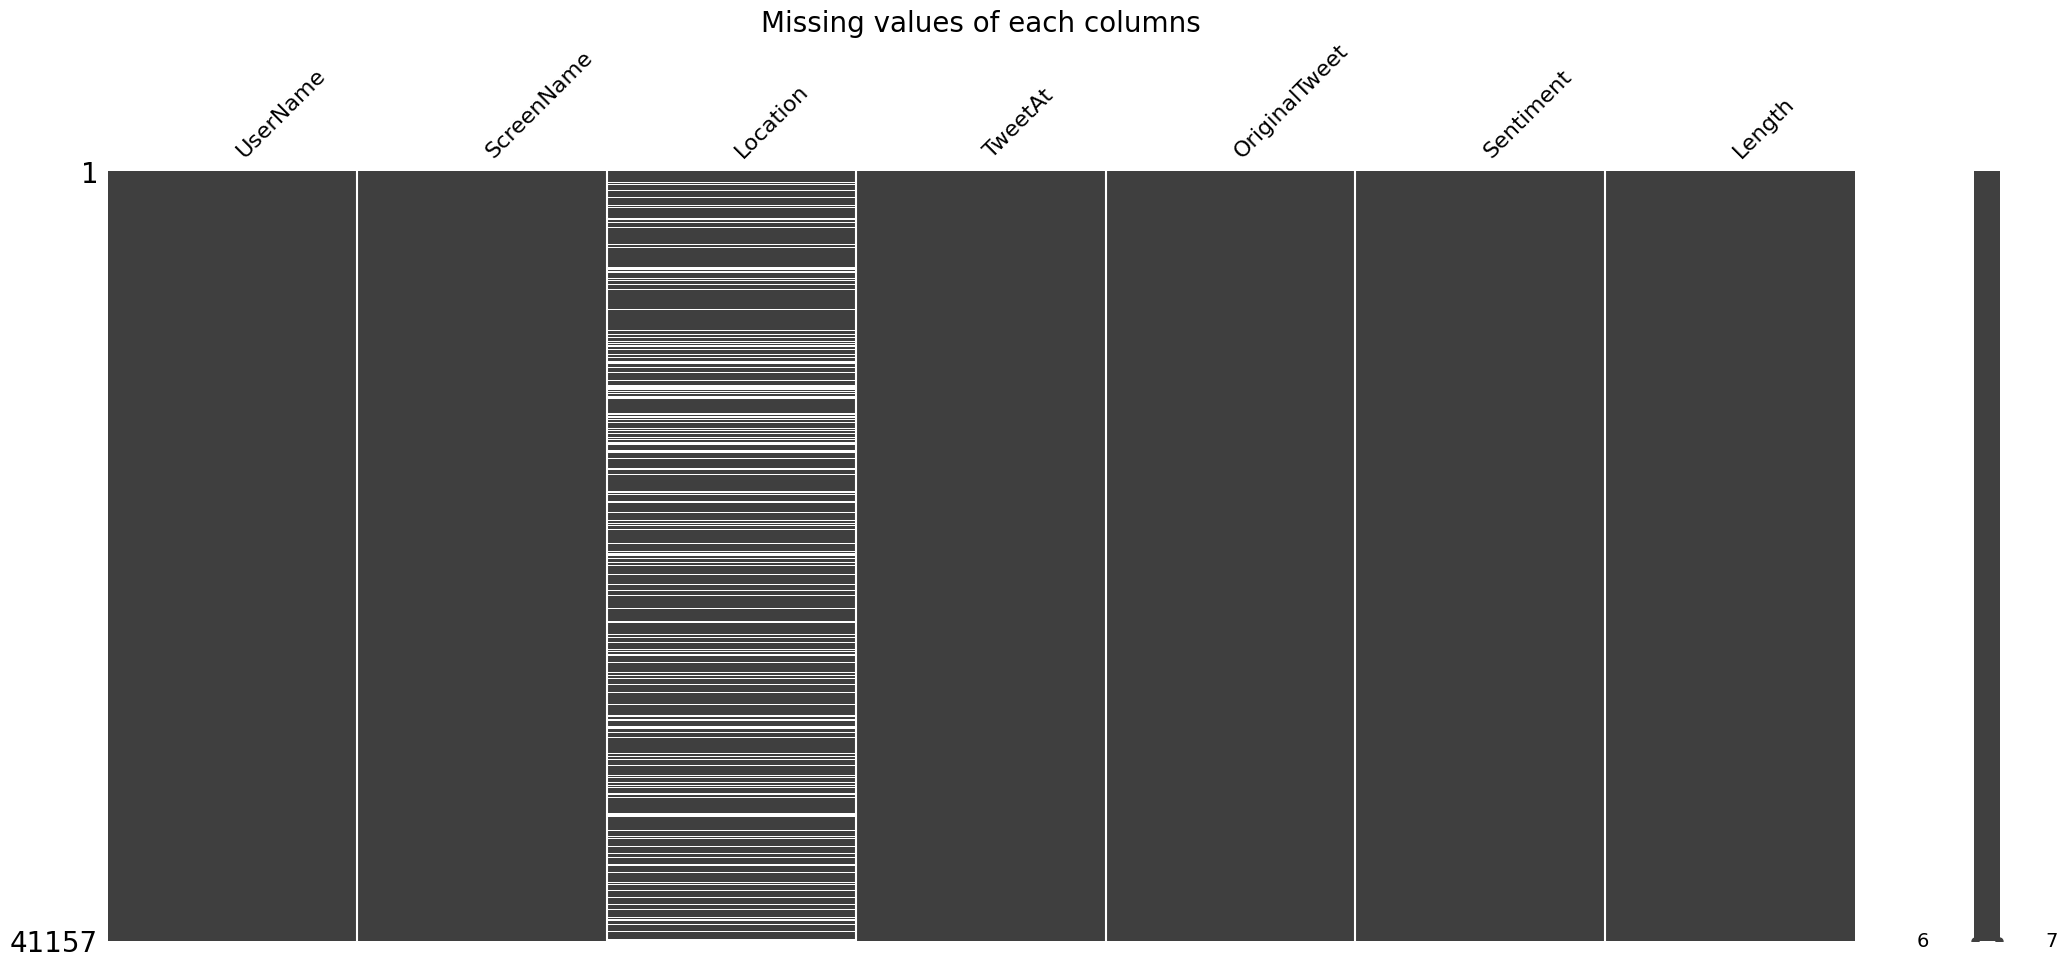

In [ ]:
msno.matrix(df)
plt.title('Missing values of each columns',fontsize=20)

In [ ]:
df.drop_duplicates(subset='OriginalTweet',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41157 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       32567 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
 6   Length         41157 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.5+ MB


Text(0.5, 1.0, 'Monthly distribution of tweets')

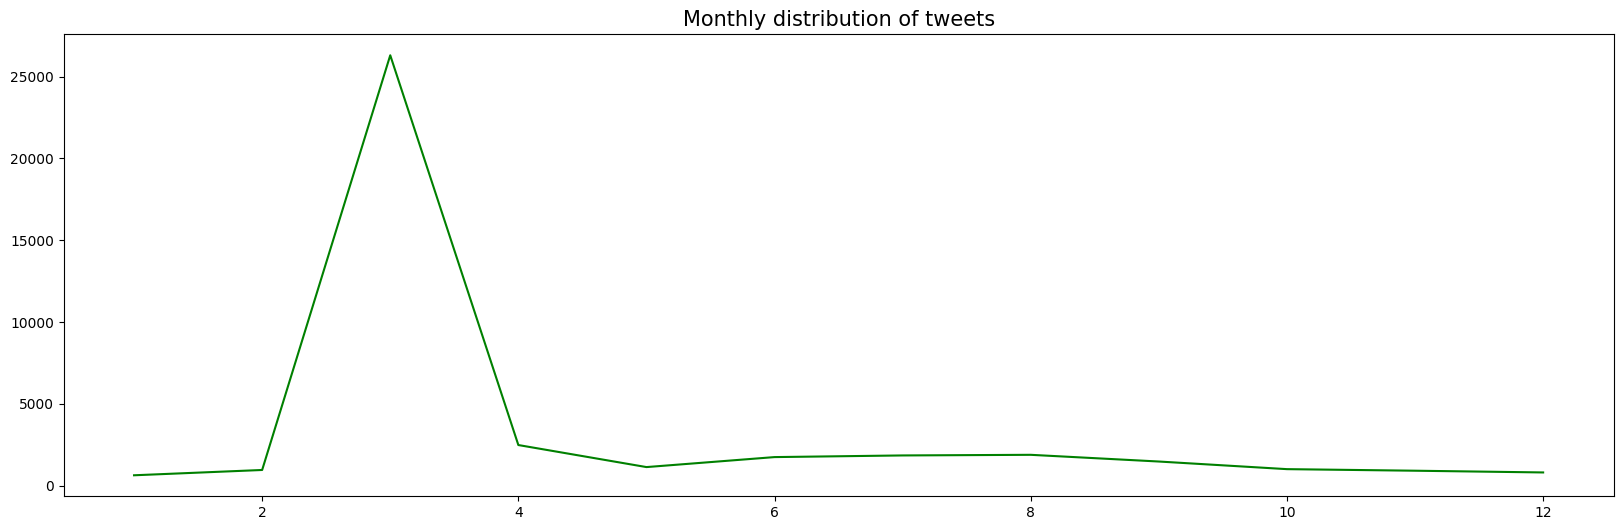

In [ ]:
time = df.groupby(['TweetAt']).size()
monthly = df['TweetAt'].dt.month.value_counts().sort_index()
plt.figure(figsize=(20,6))
sns.lineplot(x=monthly.index, y = monthly.values, color='green')
plt.title('Monthly distribution of tweets', fontsize=15)

In [ ]:
fig = px.line(df, 
              x=time.index, 
              y=time.values, 
              title = 'date of tweets',
              template='simple_white')

fig.update_layout(
font=dict(size=17,family="Times New Roman"),)

fig.show()

In [ ]:
location = df['Location'].value_counts()[:10]
fig = px.bar(x=location.index,y=location.values,text=location.values,
       color = location.index, color_discrete_sequence=px.colors.sequential.deep,
        title = 'Distribution of Top 10 Locations',
        template = 'simple_white')
fig.update_traces(textposition='inside',
                  textfont_size=11)
fig.show()

In [ ]:
sentiment = df["Sentiment"].value_counts()
fig = px.pie(values=sentiment.values, 
             names=sentiment.index,
             color_discrete_sequence=px.colors.sequential.Greens)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')
fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')

fig.show()

In [ ]:
positive = df.loc[np.where(df['Sentiment'] == 'Positive')].reset_index()
negative = df.loc[np.where(df['Sentiment'] == 'Negative')].reset_index()
neutral = df.loc[np.where(df['Sentiment'] == 'Neutral')].reset_index()
extremely_positive = df.loc[np.where(df['Sentiment'] == 'Extremely Positive')].reset_index()
extremely_negative = df.loc[np.where(df['Sentiment'] == 'Extremely Negative')].reset_index()

In [ ]:
hist_data = [extremely_positive['Length'],positive['Length'],neutral['Length'],
             negative['Length'],extremely_negative['Length']]

group_labels = ['extremely_positive','positive','neutral','negative','extremely_negative']

colors = ['navy', 'blue', 'lightblue','lightsalmon','red']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors = colors)

# Add title
fig.update_layout(title_text='Length distribution each sentiments', template = 'simple_white')
fig.show()

In [ ]:
def get_all_str(tweet):
  sentence =''
  for words in tweet:
    sentence += words
  sentence = sentence.lower()
  return sentence

def get_str(lst):
  sentence =''
  for char in lst:
    sentence += char+' '
  sentence = sentence.lower()
  return sentence

def get_word(text):
  result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
  return result

def get_hashtag(text):
    result = nltk.RegexpTokenizer(r'(?<=#)\w+').tokenize(text.lower())
    return result

def get_mention(text):
    result = nltk.RegexpTokenizer(r'(?<=@)\w+').tokenize(text.lower())
    return result 

def stopword_list(stop):
    lst = stopwords.words('english')
    for stopword in stop:
        lst.append(stopword)
    return lst

def remove_stopword(stopwords, lst):    
    stoplist = stopword_list(stopwords)
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
#     print(stoplist)
    return cleanwordlist

def pos_remove_noun(tagged):
    remove_noun = [word for word,pos in tagged if pos not in ['NN','NNS','NNP','NNPS']]
    txt = ''
    for i in range(len(remove_noun)):
        txt += remove_noun[i]
        txt += '\n'
    return cleanwordlist

def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
#     txt= ' '.join(tokens)
    return tokens

def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

# function to plot word cloud of words
def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=50,
               colormap= colormap,
               max_font_size=140,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()




In [ ]:
def whole_string(sent):
    all_str = get_all_str(sent)
    words = get_word(all_str)
    removed = remove_stopword(['http','https','co'],words)
    freq_df = Freq_df(removed)
    return freq_df

In [ ]:
freq_df = whole_string(df['OriginalTweet'])
top_10 = freq_df[:10]

fig = px.bar(top_10, x = 'Term', y = 'Frequency',text = 'Frequency', color='Term',
             color_discrete_sequence=px.colors.sequential.PuBuGn, title = 'Rank of terms',
             template = 'simple_white')
    
fig.update_traces(textposition='inside',
                  textfont_size=11)
fig.show()

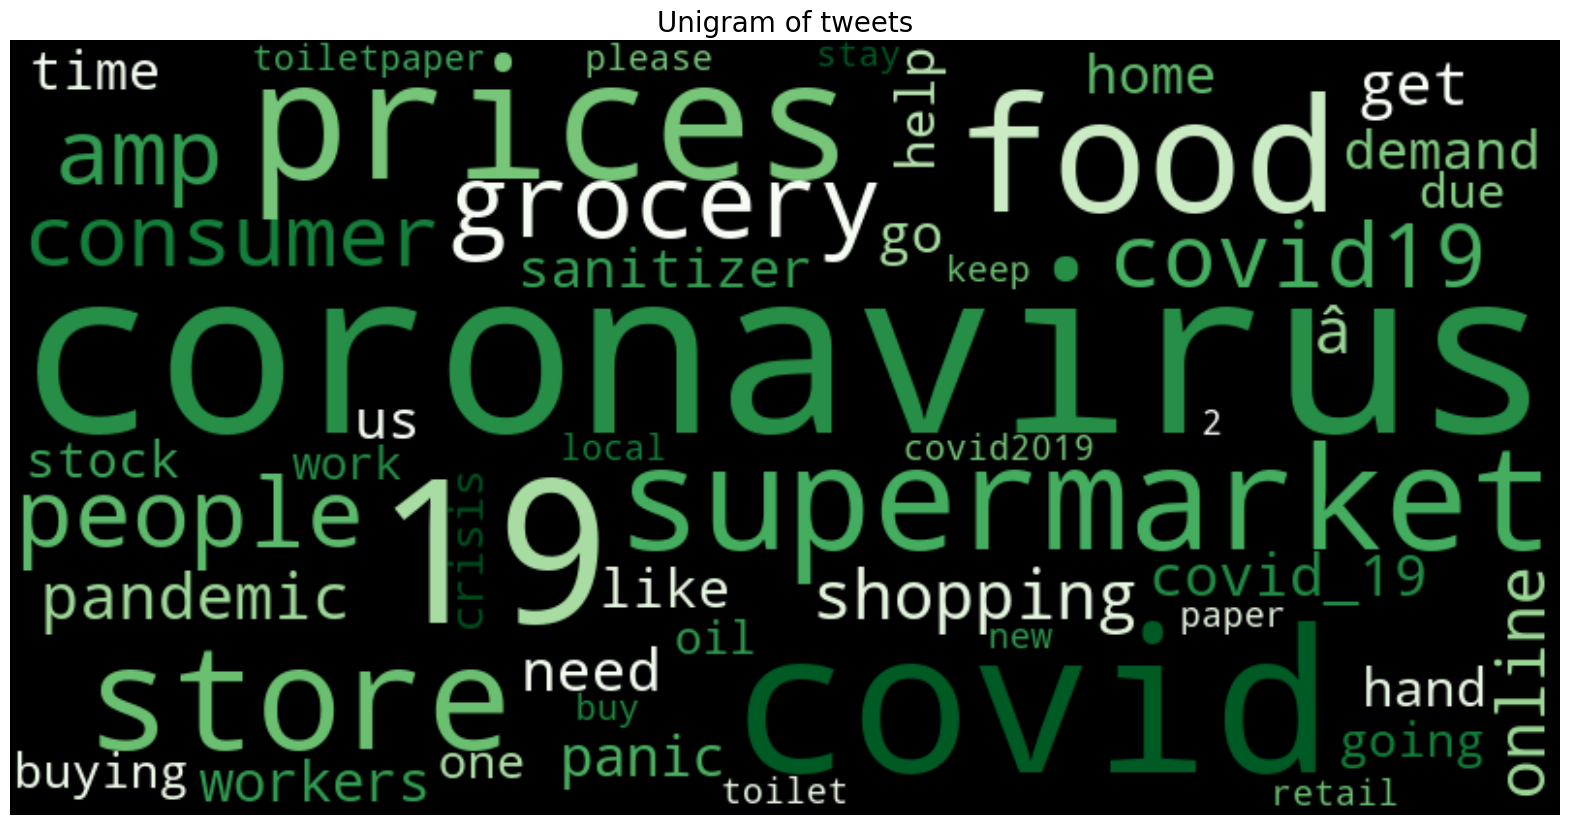

In [ ]:
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black', 'Greens_r', 'Unigram of tweets')

In [ ]:
def hashtag(sent):
    all_str = get_all_str(sent)
    words = get_hashtag(all_str)
    removed = remove_stopword(['http','https','co'],words)
    freq_df = Freq_df(removed)
    return freq_df

def mention(sent):
    all_str = get_all_str(sent)
    words = get_mention(all_str)
    removed = remove_stopword(['http','https','co'],words)
    freq_df = Freq_df(removed)
    return freq_df
hashtag_df = hashtag(df['OriginalTweet'])
mention_df = mention(df['OriginalTweet'])

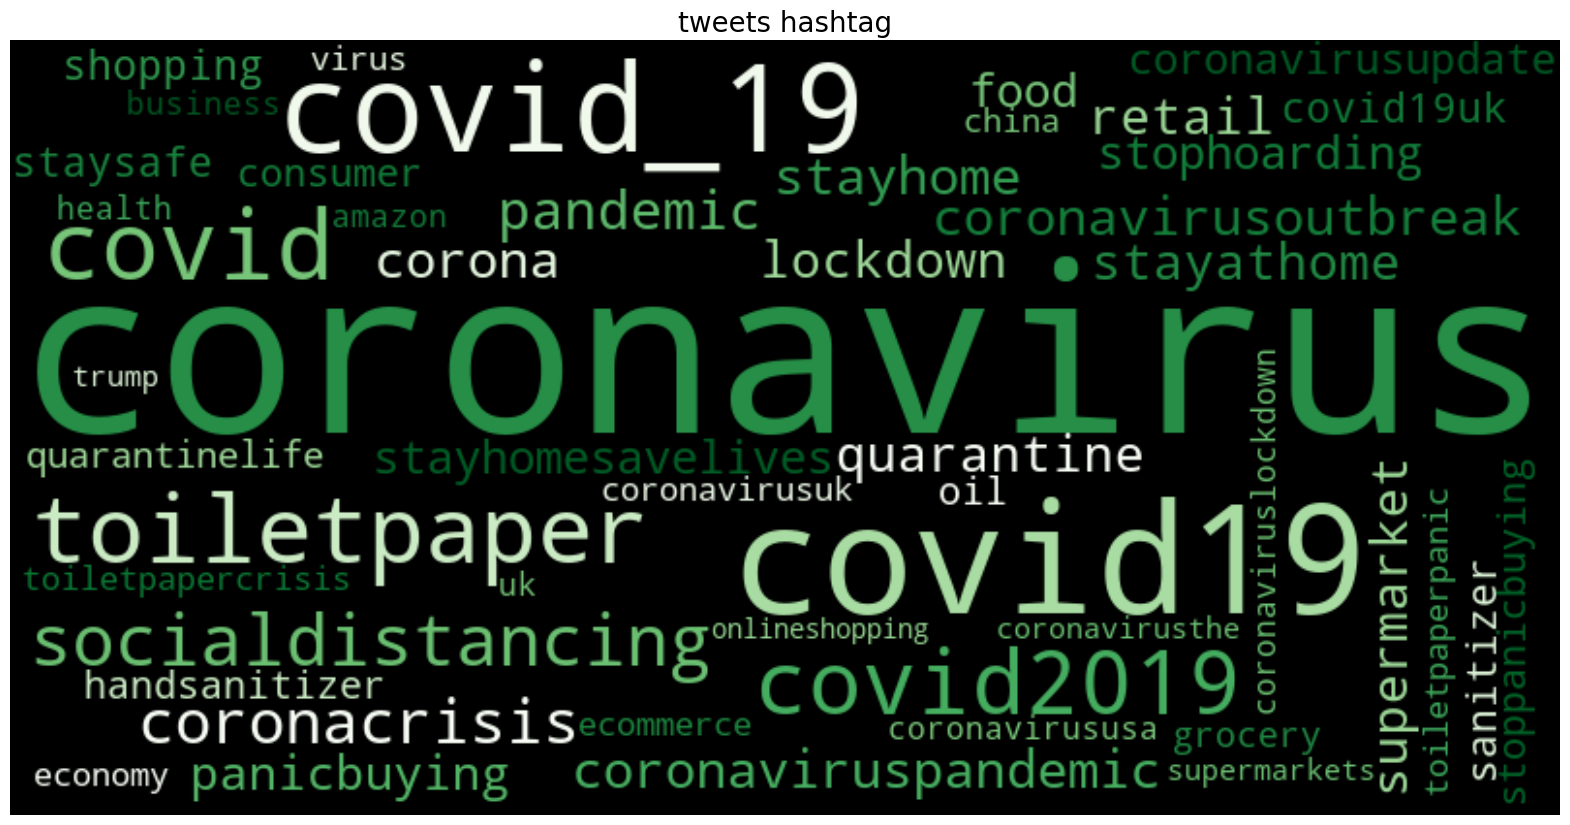

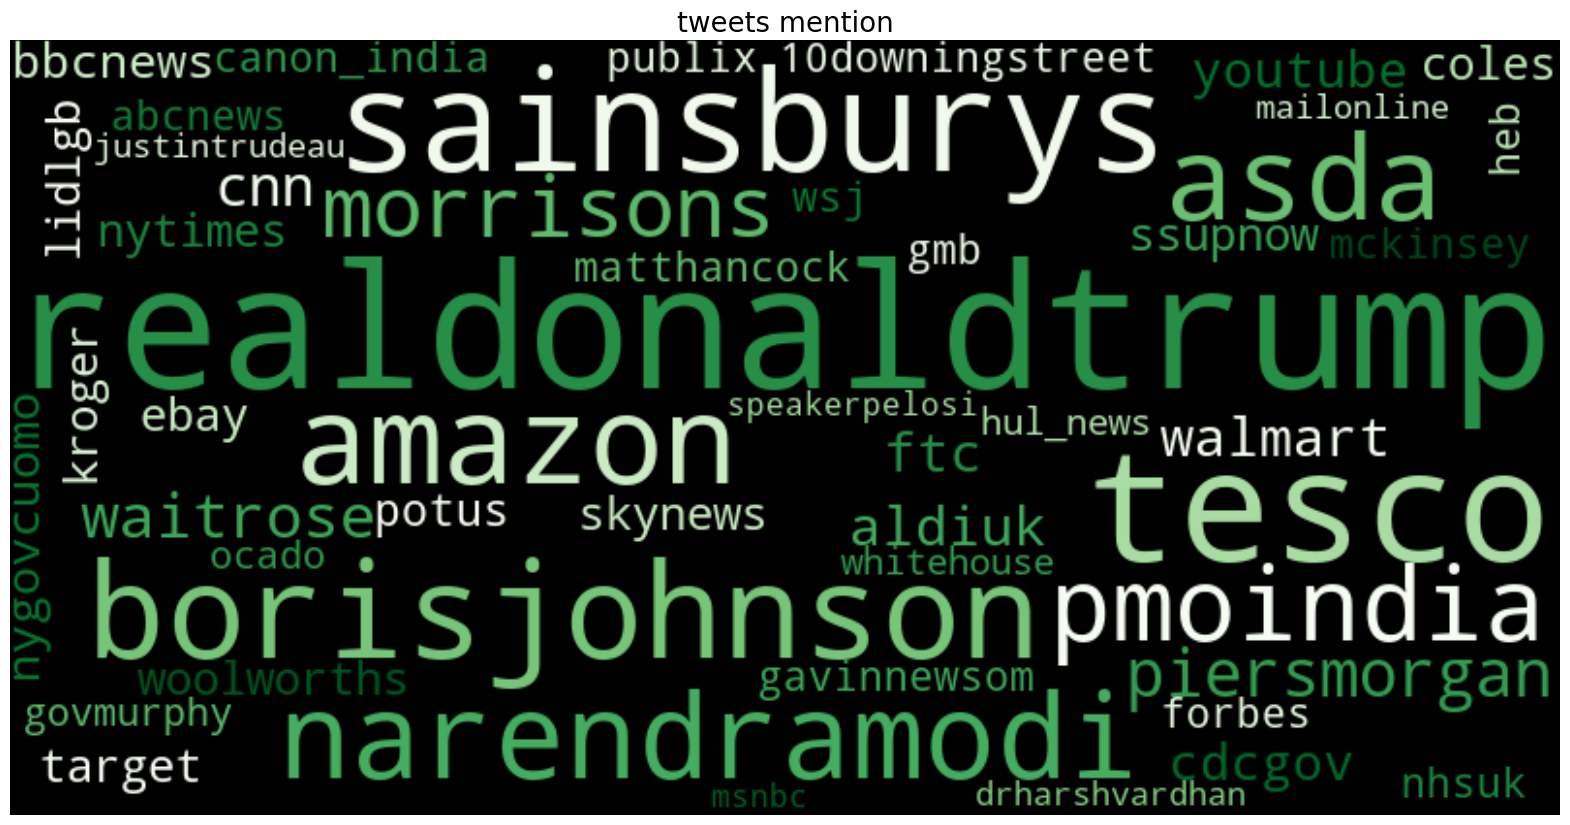

In [ ]:
hashtag = hashtag_df.set_index('Term').to_dict()['Frequency']
mention = mention_df.set_index('Term').to_dict()['Frequency']
Word_Cloud(hashtag ,'black', 'Greens_r', 'tweets hashtag')
Word_Cloud(mention ,'black', 'Greens_r', 'tweets mention')

In [ ]:
positive_df = whole_string(positive['OriginalTweet'])
negative_df = whole_string(negative['OriginalTweet'])
neutral_df = whole_string(neutral['OriginalTweet'])
extremely_positive_df = whole_string(extremely_positive['OriginalTweet'])
extremely_negative_df = whole_string(extremely_negative['OriginalTweet'])

In [ ]:
# data = dict(zip(positive_df['Term'].tolist(), positive_df['Frequency'].tolist()))
expost = extremely_positive_df.set_index('Term').to_dict()['Frequency']
post= positive_df.set_index('Term').to_dict()['Frequency']
neut = neutral_df.set_index('Term').to_dict()['Frequency']
nega = negative_df.set_index('Term').to_dict()['Frequency']
exnega = extremely_negative_df.set_index('Term').to_dict()['Frequency']

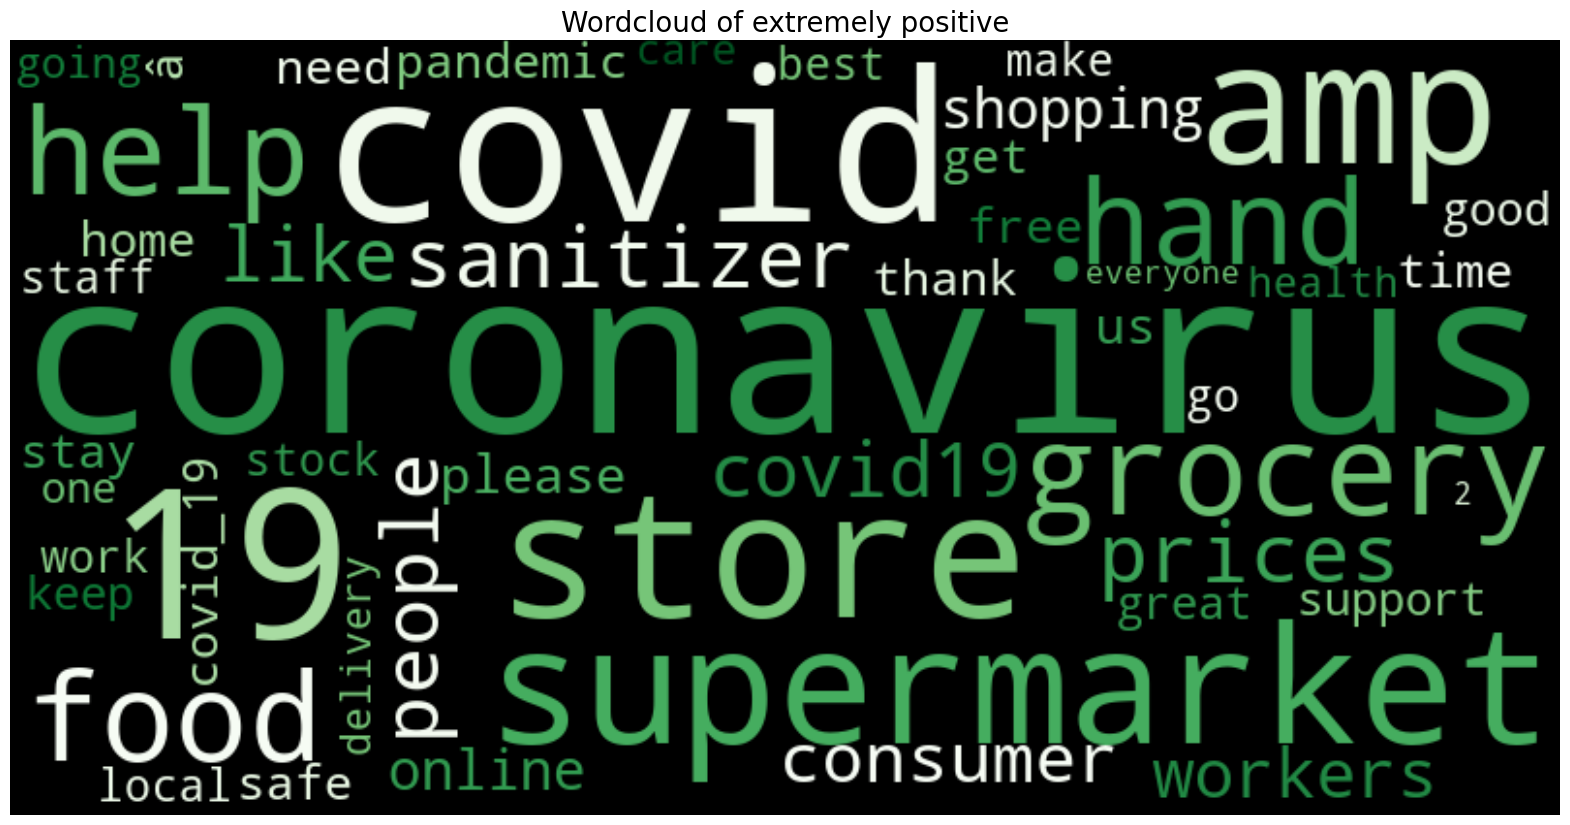

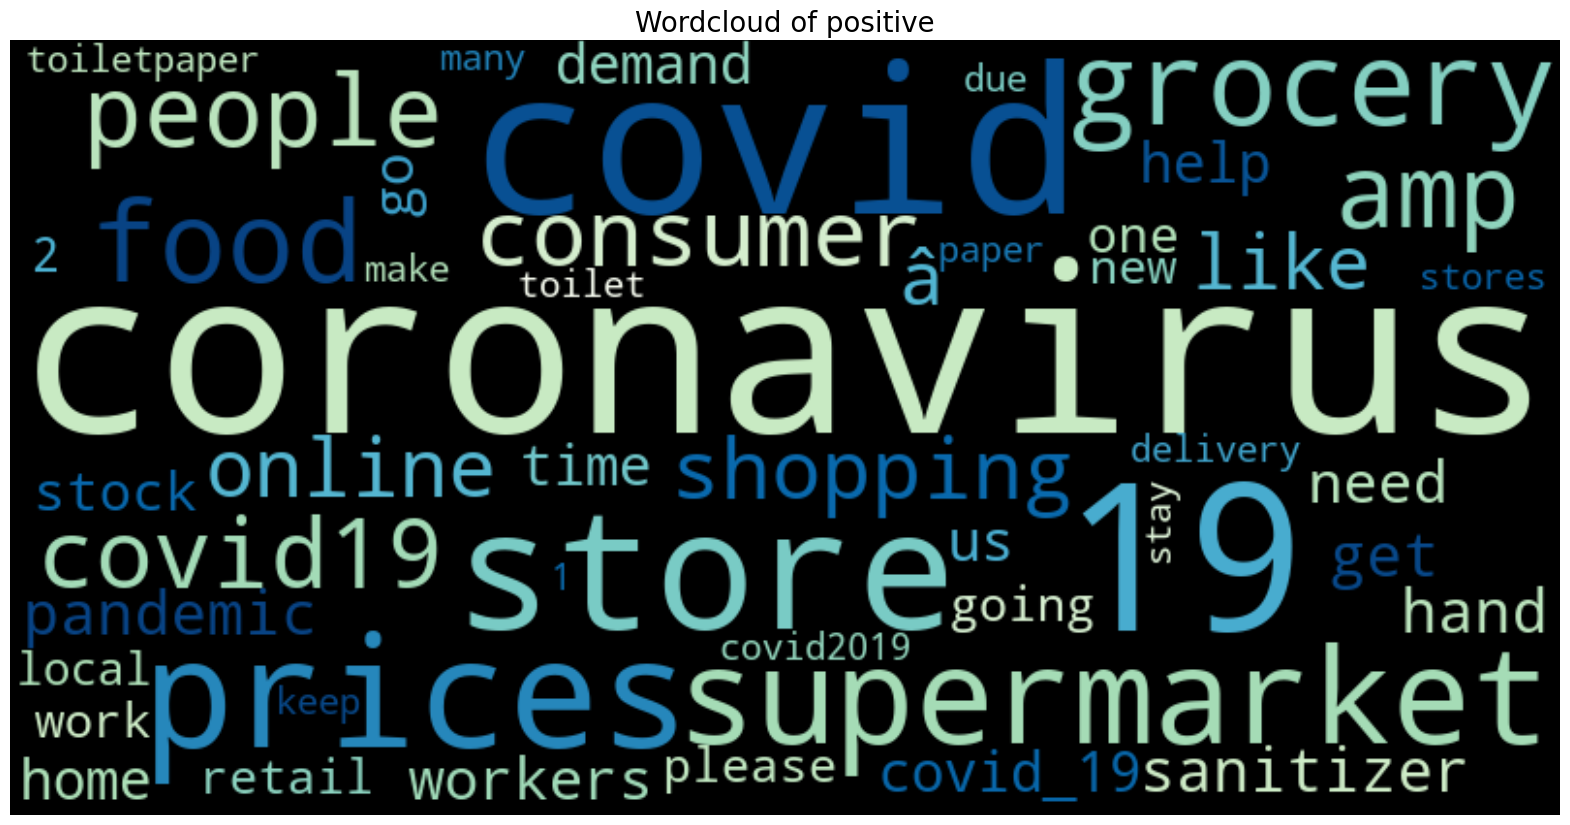

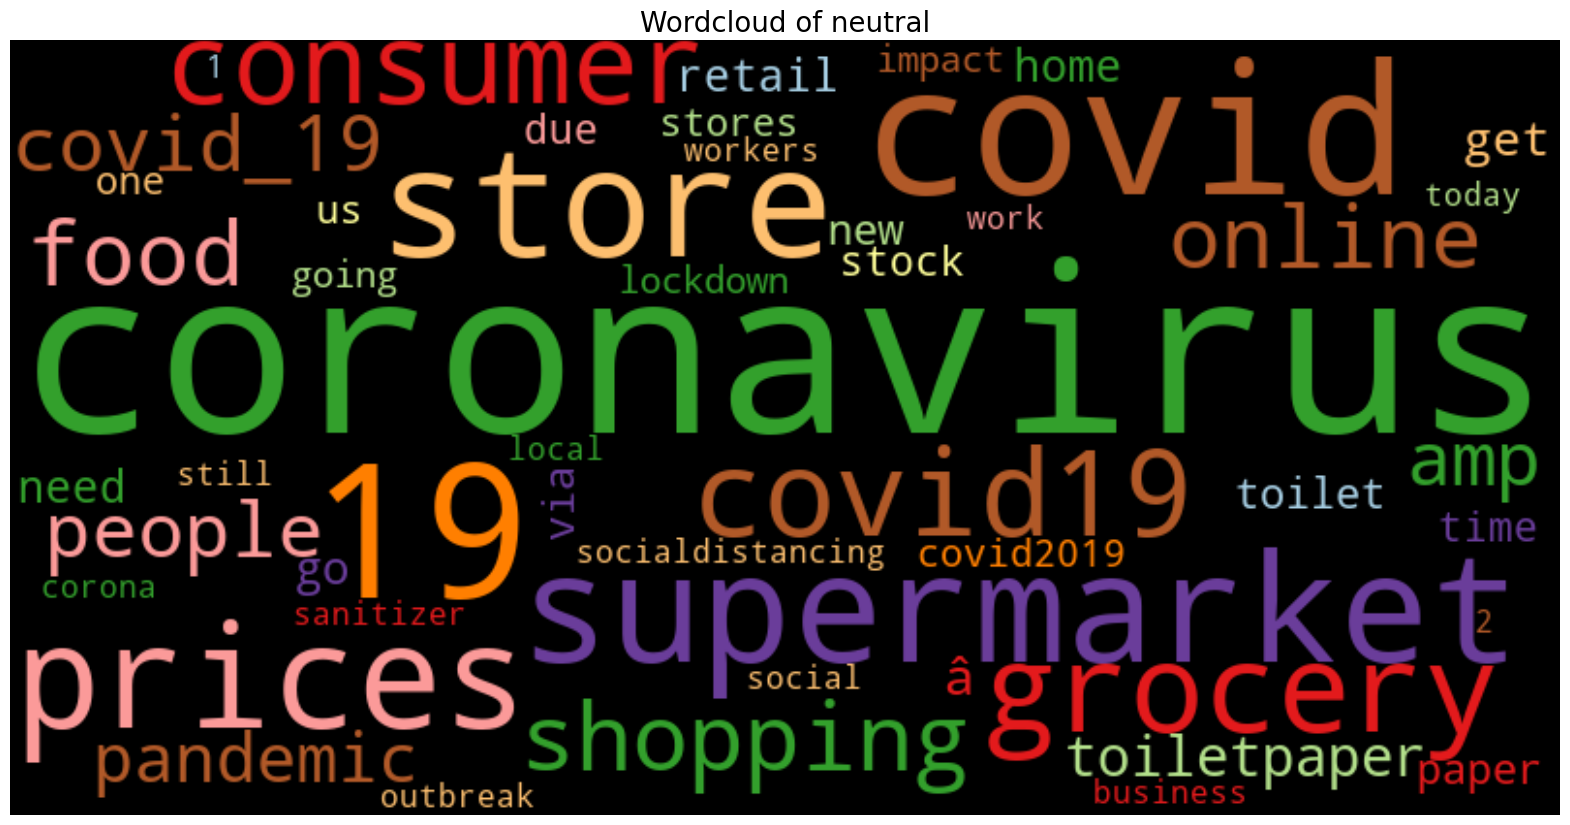

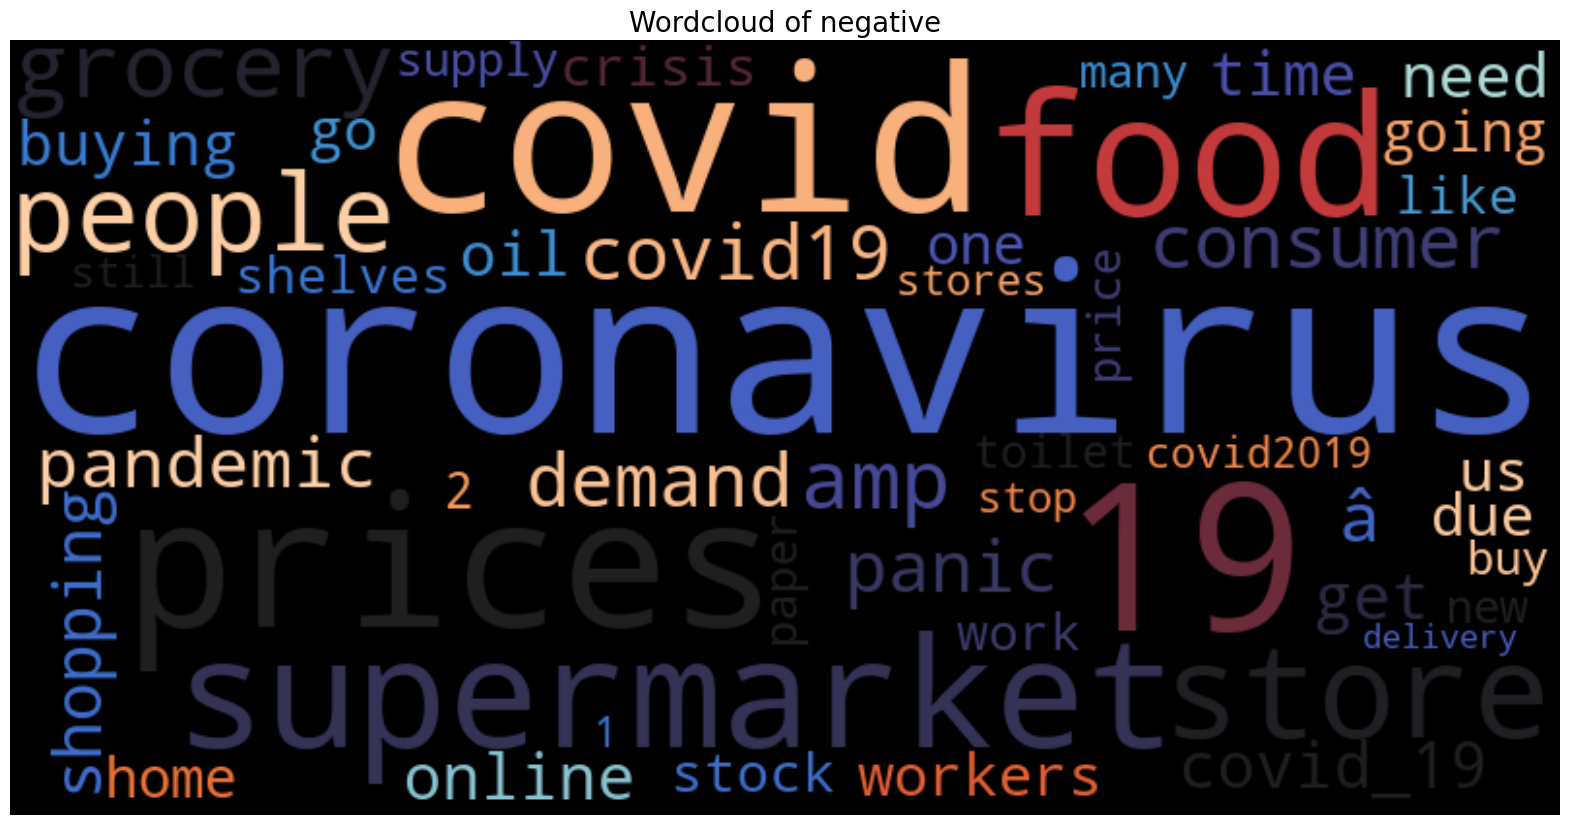

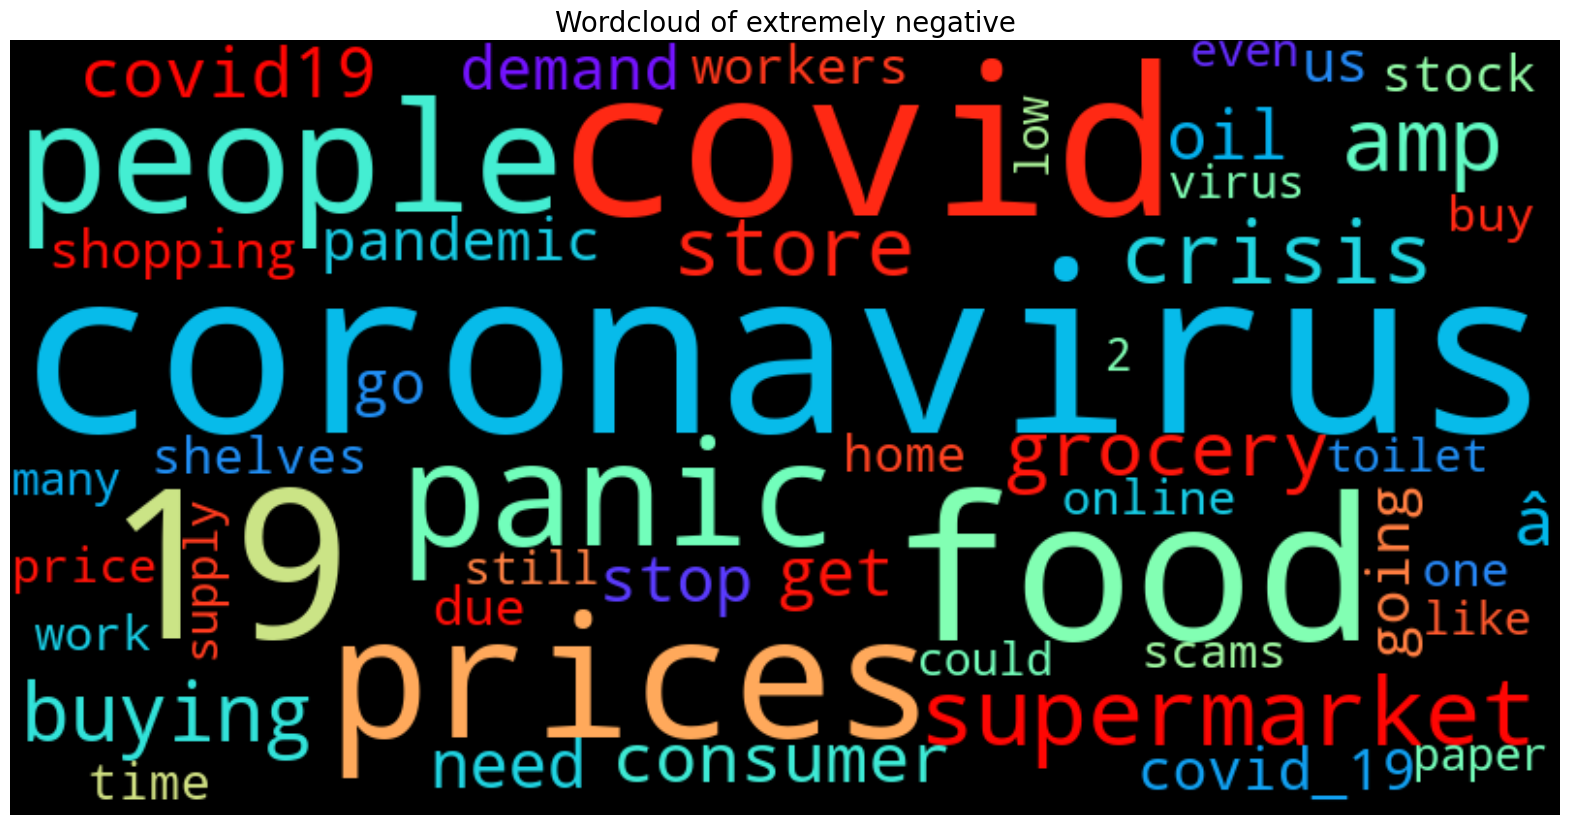

In [ ]:
Word_Cloud(expost ,'black', 'Greens_r', 'Wordcloud of extremely positive')
Word_Cloud(post ,'black', 'GnBu', 'Wordcloud of positive')
Word_Cloud(neut ,'black', 'Paired', 'Wordcloud of neutral')
Word_Cloud(nega ,'black', 'icefire', 'Wordcloud of negative')
Word_Cloud(exnega ,'black', 'rainbow', 'Wordcloud of extremely negative')

In [ ]:
df = df[:15000]
def preprocessing(text):
    words = get_word(text)
    lemma = lemmatization(words)
    removed = remove_stopword(['http','ly'],lemma)
    return removed
df['OriginalTweet'] = df['OriginalTweet'].apply(preprocessing)
df['OriginalTweet'] = df['OriginalTweet'].apply(get_str)

In [ ]:
print(df.shape)
df.tail(5)

(15000, 7)


UserName  ScreenName              Location    TweetAt  \
14995     18794       63746  University of Surrey 2020-03-22   
14996     18795       63747   Birmingham, England 2020-03-22   
14997     18796       63748   Tipperary, Ireland. 2020-03-22   
14998     18797       63749               British 2020-03-22   
14999     18798       63750               Alberta 2020-03-22   

                                           OriginalTweet           Sentiment  \
14995                      still donâ get co voduhdwo99              Neutral   
14996  chaotic scene supermarket shopper heeding advi...  Extremely Negative   
14997  roaring 20 ha brought covid_19 illness stock m...            Negative   
14998  potus must follw danish british economic model...  Extremely Negative   
14999  jaimeekara demand certain good including hand ...            Positive   

       Length  
14995      60  
14996     233  
14997     207  
14998     255  
14999     255

In [ ]:
vector = CountVectorizer()
X = vector.fit(df['OriginalTweet'])
X_transform = X.transform(df['OriginalTweet'])

In [ ]:
print(X_transform.shape)
pd.DataFrame(X_transform.toarray(), columns=vector.get_feature_names()).head(5)

(15000, 33877)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



00  000  0000009375  0000hrs  000francs  000s  008  00am  00hrs  \
0   0    0           0        0          0     0    0     0      0   
1   0    0           0        0          0     0    0     0      0   
2   0    0           0        0          0     0    0     0      0   
3   0    0           0        0          0     0    0     0      0   
4   0    0           0        0          0     0    0     0      0   

   00pdsup4wb  ...  zyocje8e18  zyrmiro9cq  zyxg2qqvkx  zz7gjzlvns  \
0           0  ...           0           0           0           0   
1           0  ...           0           0           0           0   
2           0  ...           0           0           0           0   
3           0  ...           0           0           0           0   
4           0  ...           0           0           0           0   

   zzczwfp7ih  zzkxpxsnuh  zzsmn5qjla  zzz  zã  zã¼rich  
0           0           0           0    0   0        0  
1           0           0           0    0   0        0  
2           0           0           0    0   0        0  
3           0           0           0    0   0        0  
4           0           0           0    0   0        0  

[5 rows x 33877 columns]

In [ ]:
Tfidf = TfidfTransformer()
tfidf_transformer = Tfidf.fit(X_transform)
X = tfidf_transformer.transform(X_transform)

In [ ]:
print(X.shape)
df_tfidf = pd.DataFrame(X.toarray(), columns=vector.get_feature_names())
df_tfidf.head(5)

(15000, 33877)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



00  000  0000009375  0000hrs  000francs  000s  008  00am  00hrs  \
0  0.0  0.0         0.0      0.0        0.0   0.0  0.0   0.0    0.0   
1  0.0  0.0         0.0      0.0        0.0   0.0  0.0   0.0    0.0   
2  0.0  0.0         0.0      0.0        0.0   0.0  0.0   0.0    0.0   
3  0.0  0.0         0.0      0.0        0.0   0.0  0.0   0.0    0.0   
4  0.0  0.0         0.0      0.0        0.0   0.0  0.0   0.0    0.0   

   00pdsup4wb  ...  zyocje8e18  zyrmiro9cq  zyxg2qqvkx  zz7gjzlvns  \
0         0.0  ...         0.0         0.0         0.0         0.0   
1         0.0  ...         0.0         0.0         0.0         0.0   
2         0.0  ...         0.0         0.0         0.0         0.0   
3         0.0  ...         0.0         0.0         0.0         0.0   
4         0.0  ...         0.0         0.0         0.0         0.0   

   zzczwfp7ih  zzkxpxsnuh  zzsmn5qjla  zzz   zã  zã¼rich  
0         0.0         0.0         0.0  0.0  0.0      0.0  
1         0.0         0.0         0.0  0.0  0.0      0.0  
2         0.0         0.0         0.0  0.0  0.0      0.0  
3         0.0         0.0         0.0  0.0  0.0      0.0  
4         0.0         0.0         0.0  0.0  0.0      0.0  

[5 rows x 33877 columns]

In [ ]:
X

<15000x33877 sparse matrix of type '<class 'numpy.float64'>'
	with 285931 stored elements in Compressed Sparse Row format>

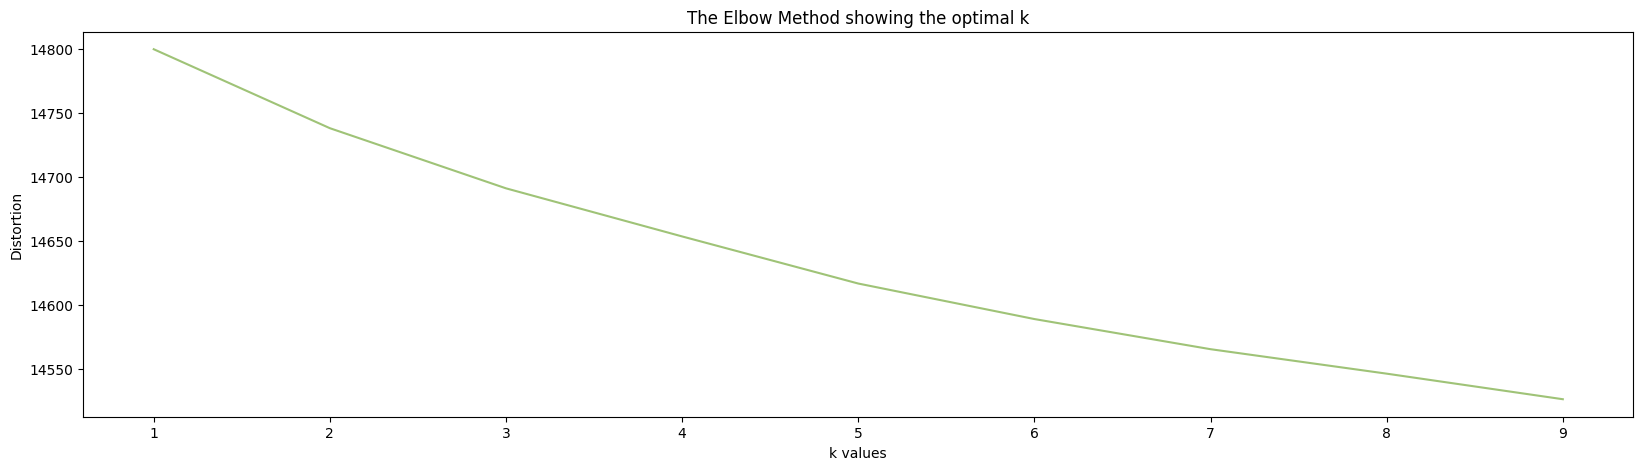

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k,random_state=7)
    kmean.fit(X)
    distortions.append(kmean.inertia_)
    
plt.figure(figsize=(20,5))
plt.plot(K, distortions, '-',color='g')
plt.xlabel('k values')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

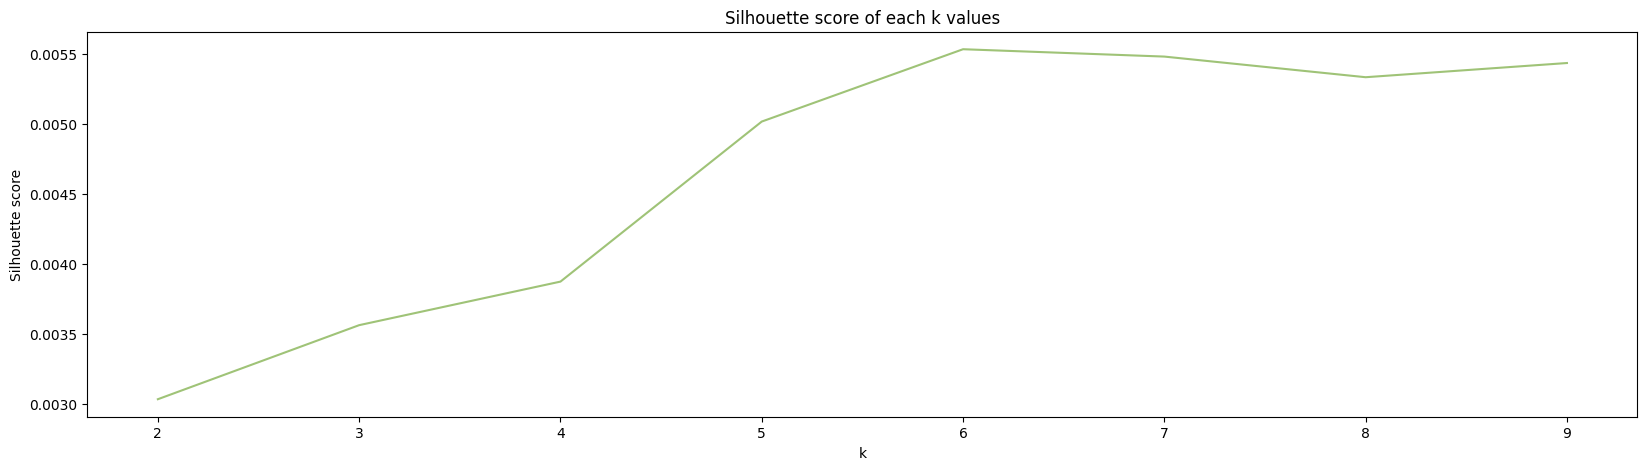

In [ ]:
K = range(2,10)
silhouette = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    preds = kmeanModel.predict(X)
    silhouette.append(silhouette_score(X, preds))
    
plt.figure(figsize=(20,5))
plt.plot(K, silhouette, '-',color='g')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score of each k values')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PCA = pca.fit(X.toarray())
X_pca = pca.transform(X.toarray())

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10),size=(1080, 500))

visualizer.fit(X_pca)        
visualizer.show() 

In [ ]:
silhouette = []
K = range(2,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_pca)
    preds = kmeanModel.predict(X_pca)
    silhouette.append(silhouette_score(X_pca, preds))
    
plt.figure(figsize=(20,5))
plt.plot(K, silhouette, '-',color='g')
plt.xlabel('k values')
plt.ylabel('Silhouette score')
plt.title('Silhouette score of each k values')
plt.show()

NameError: ignored

In [ ]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X_pca)
pred_labels = kmeanModel.labels_;
pred_centers = kmeanModel.cluster_centers_
df_centers = pd.DataFrame(pred_centers, columns=['x', 'y'])
df_centers.head(1)

NameError: ignored

In [ ]:
dfcl = pd.DataFrame(columns=['x','y','label'])
dfcl['x'] = X_pca[:,0]
dfcl['y'] = X_pca[:,1]
dfcl['label'] = kmeanModel.labels_
dfcl.head(1)

NameError: ignored

In [ ]:
plt.figure(figsize=(20,5))

sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=pred_labels.tolist(),palette='Set2')
colors = ['red', 'green', 'blue', 'yellow']

for i,color in enumerate(df_centers.index.tolist()):
    plt.plot(df_centers['x'][i], df_centers['y'][i], 'X', label='K-means center: %d' % i, color=colors[i])
plt.xlabel('x distance')
plt.ylabel('y distance')
plt.title('scatter plot')

In [ ]:
df['label'] = pred_labels
df = df[['OriginalTweet','label']]
label1 = df[df['label']==0]
label2 = df[df['label']==1]
label3 = df[df['label']==2]
words1 = get_word(get_all_str(label1['OriginalTweet']))
words2 = get_word(get_all_str(label2['OriginalTweet']))
words3 =  get_word(get_all_str(label3['OriginalTweet']))
df1 = Freq_df(words1)
df2 = Freq_df(words2)
df3 = Freq_df(words3)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='label0', x=df1['Term'][:20].values, y=df1['Frequency'][:20].values,text=df1['Frequency'][:20].values,marker_color='blue'),
    go.Bar(name='label1', x=df2['Term'][:20].values, y=df2['Frequency'][:20].values,text=df1['Frequency'][:20].values,marker_color='yellow'),
    go.Bar(name='label2', x=df3['Term'][:20].values, y=df3['Frequency'][:20].values,text=df1['Frequency'][:20].values,marker_color='red')
])
fig.update_layout(barmode='stack', xaxis_tickangle=-45,title='top 20 frequent terms on each clusters', template='simple_white')

fig.show()